<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/L18-IntroductionGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Graphs

This notebook provides a brief introduction to graphs and their use with [networkx](https://networkx.org/)

## Plot Graphs

## Undirected Graph

In [9]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Dublin','Paris'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

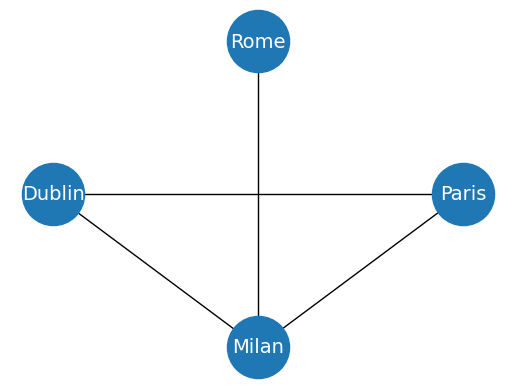

In [10]:

# Plot graph
plt.figure()
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.shell_layout(G),
                 node_size=2000,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
#draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [11]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Milan', 'Paris', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Milan', 'Paris'), ('Milan', 'Rome')]


In [13]:
{v: G.degree(v) for v in G.nodes}

{'Dublin': 2, 'Milan': 3, 'Paris': 2, 'Rome': 1}

In [ ]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Dublin': 2, 'Rome': 1, 'Paris': 2, 'Milan': 3}
Neighbors for nodes: {'Dublin': ['Milan', 'Paris'], 'Rome': ['Milan'], 'Paris': ['Milan', 'Dublin'], 'Milan': ['Dublin', 'Paris', 'Rome']}


In [ ]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Dublin', 'Rome', 'Paris', 'Milan']
Edges: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Paris', 'Milan')]


In [ ]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Paris', 'Milan', 'Madrid', 'London']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Rome', 'London'), ('Paris', 'Milan'), ('Paris', 'Madrid')]


In [ ]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Paris', 'Milan']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Paris', 'Milan')]


In [ ]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Paris', 'Milan']
E = [('Dublin', 'Paris'), ('Rome', 'Milan')]


In [ ]:
print(nx.to_edgelist(G))

[('Dublin', 'Paris', {}), ('Rome', 'Milan', {})]


In [ ]:
print(nx.to_pandas_adjacency(G))

        Dublin  Rome  Paris  Milan
Dublin     0.0   0.0    1.0    0.0
Rome       0.0   0.0    0.0    1.0
Paris      1.0   0.0    0.0    0.0
Milan      0.0   1.0    0.0    0.0


## Directed Graph

In [ ]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Paris   Milan
1  Paris  Dublin
2  Milan  Dublin
3  Milan    Rome
        Dublin  Rome  Paris  Milan
Dublin     0.0   0.0    0.0    0.0
Rome       0.0   0.0    0.0    0.0
Paris      1.0   0.0    0.0    1.0
Milan      1.0   1.0    0.0    0.0


In [ ]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Dublin': 2, 'Rome': 1, 'Paris': 0, 'Milan': 1}
Outegree for nodes: {'Dublin': 0, 'Rome': 0, 'Paris': 2, 'Milan': 2}


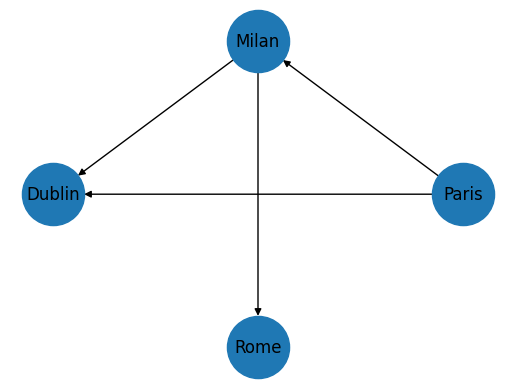

In [ ]:
plt.axis('off')
nx.draw_networkx(G, pos=nx.shell_layout(G), node_size=2000)

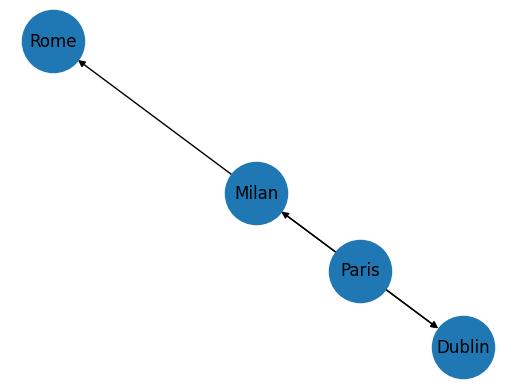

In [ ]:
plt.axis('off')
nx.draw_networkx(G, pos=nx.spring_layout(G), node_size=2000)

## Weighted Directed Graph

In [ ]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]

In [ ]:
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])

In [ ]:
print(nx.to_pandas_edgelist(G))

  source  target  weight
0  Paris  Dublin      11
1  Paris   Milan       8
2  Milan    Rome       5
3  Milan  Dublin      19


In [ ]:
print(nx.to_pandas_adjacency(G))

        Dublin  Rome  Paris  Milan
Dublin     0.0   0.0    0.0    0.0
Rome       0.0   0.0    0.0    0.0
Paris     11.0   0.0    0.0    8.0
Milan     19.0   5.0    0.0    0.0


{('Paris', 'Dublin'): Text(0.0, 4.371138828673793e-08, '11'),
 ('Paris', 'Milan'): Text(0.49999983111688096, 0.5000000874227766, '8'),
 ('Milan', 'Rome'): Text(-1.629206787256976e-07, 0.0, '5'),
 ('Milan', 'Dublin'): Text(-0.500000168883119, 0.4999999562886117, '19')}

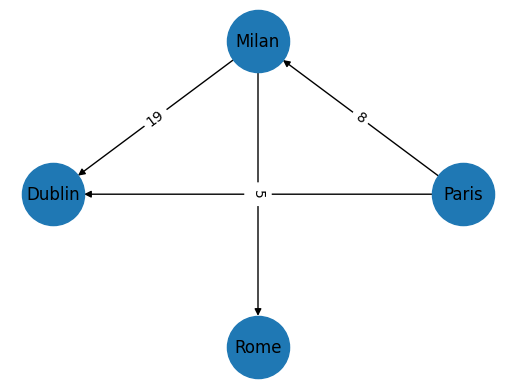

In [ ]:
plt.axis('off')
nx.draw_networkx(G, pos=nx.shell_layout(G), node_size=2000)
nx.draw_networkx_edge_labels(G, pos=nx.shell_layout(G), edge_labels=edge_labels)

{('Paris', 'Dublin'): Text(0.2881268167903404, 0.4901719277642542, '11'),
 ('Paris', 'Milan'): Text(0.09939024207318138, 0.20715849494922373, '8'),
 ('Milan', 'Rome'): Text(-0.2881268167903406, -0.49017192776425406, '5'),
 ('Milan', 'Dublin'): Text(0.27309760084490015, 0.3026695772865224, '19')}

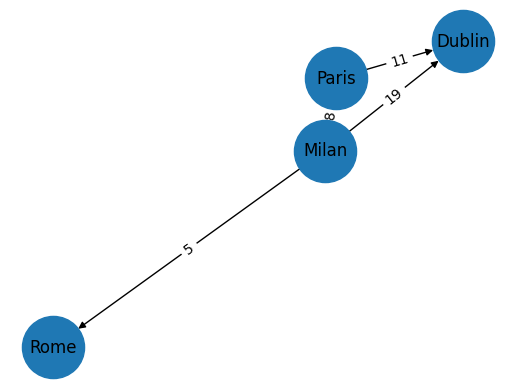

In [ ]:
plt.axis('off')
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=0), node_size=2000)
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G, seed=0), edge_labels=edge_labels)

## Bipartite Graph

In [ ]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

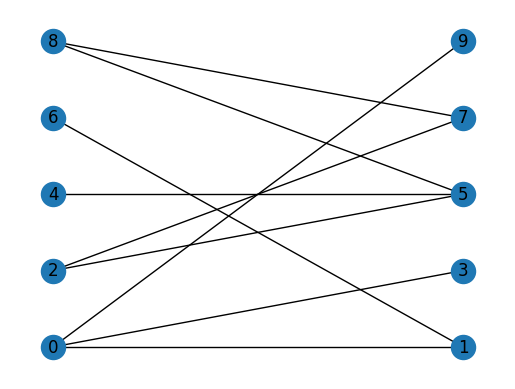

In [ ]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
plt.axis('off')
nx.draw_networkx(B, pos=pos)

## Multi Graph

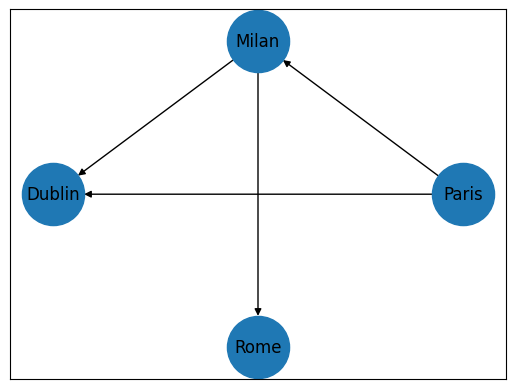

In [ ]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

nx.draw_networkx(G, pos=nx.shell_layout(G), node_size=2000)